In [ ]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
#importing lib and dataset
import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
#preprocessing the data
x = mnist.data
y = mnist.target
y_onehot = pd.get_dummies(y)

In [3]:
# split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y_onehot, test_size=0.1, random_state=42)

Final accuracy: 96.97%


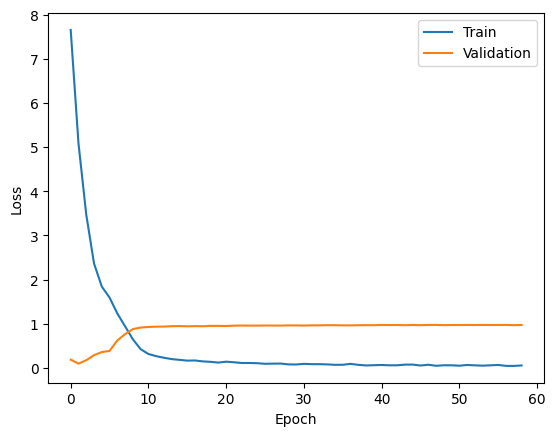

In [ ]:
#creating the model - FCNN
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

# create an MLP classifier hidden layers
model = MLPClassifier(hidden_layer_sizes=(300,100,30,10), max_iter=100, alpha=0.01, learning_rate_init=0.001, solver='adam', random_state=42, validation_fraction =0.1,early_stopping=True)

# fit the model to the training data
model.fit(x_train, y_train)

# evaluate the model on the test data and obtain the test loss
test_acc = model.score(x_test, y_test)
print('Final accuracy: {:.2f}%'.format(test_acc * 100))

train_loss = model.loss_curve_
val_loss = model.validation_scores_

# plot the loss curves
plt.plot(train_loss, label='Train')
plt.plot(val_loss, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



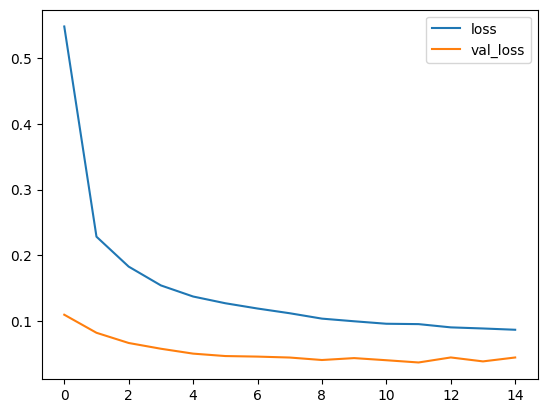

313/313 [==============================] - 3s 9ms/step - loss: 0.0431 - accuracy: 0.9882
Test loss: 0.043054454028606415
Test accuracy: 0.99


In [4]:
#Question2 - CNN Model
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from IPython.display import clear_output
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values between 0 and 1
x_train_full = x_train_full.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Split the training set into training and validation sets
# Set aside 5,000 examples for validation
x_train, x_val = x_train_full[:-5000], x_train_full[-5000:]
y_train, y_val = y_train_full[:-5000], y_train_full[-5000:]

# Print the shape of each dataset
print('Training dataset shape:', x_train.shape, y_train.shape)
print('Validation dataset shape:', x_val.shape, y_val.shape)
print('Test dataset shape:', x_test.shape, y_test.shape)


# Add a channel dimension to the images
x_train = x_train[..., tf.newaxis]
x_val = x_val[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# Build the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout((0.25)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout((0.25)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout((0.25)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

class PlotLoss(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.fig = plt.figure()
        self.logs = []
        
    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show()
        
plot_loss = PlotLoss()

# Compile the model
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=15, validation_data=(x_val, y_val),  callbacks=[plot_loss])

test_loss, test_acc = model.evaluate(x_test, y_test)

# Print the test loss and accuracy
print('Test loss:', test_loss)
print('Test accuracy:', round(test_acc,2))



3. Compare the performance of the two models and explain the difference.

When I initially built the models and run them, I thought CNN took more time.
CNN even with one layer is achieving 95% plus  results where as fully connected layer is around 90% (300 neurons). In theory CNN is better than fully connected layer as it understands the spacial features. Come to think of it both of them are multiplication end of the day just the way it is done is different.
Over all the accuracies for both the models are high but CNN beats FCNN for image processing because of spacial feature detection and also data augumentation seems to be easier in CNN vs FCNN.
For same number of parameters CNN takes higher time for training vs FCNN as the data points are more (each parameter runs through the whole image unlike FCNN)
For FCNN number of epochs taken to flatten the training loss were around 10-12 but CNN converged fasted. I would imagine since CNN is able to capture the features bettern than FCNN is the leading cause. 